In [51]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
import shutil
from tqdm import tqdm

In [72]:
def showimg(path, from_array=True, label="", figsize=(3, 3), cmap='gray'):
    """
    Display an image using matplotlib.
    
    Parameters:
    - path: str or numpy array. Path to the image file or the image array to display.
    - from_array: bool. If True, `path` is considered as a numpy array. If False, it's treated as a file path.
    - label: str. Optional title for the image.
    - figsize: tuple. Size of the figure to display.
    - cmap: str. Color map to apply if the image is grayscale.
    
    Returns:
    - None
    """
    if from_array:
        if isinstance(path, np.ndarray):
            plt.figure(figsize=figsize)
            plt.imshow(cv2.cvtColor(path,cv2.COLOR_BGR2RGB))
            if label:
                plt.title(label)
            plt.axis('off')
            plt.show()
        else:
            raise ValueError("Expected a numpy array for `path` when `from_array` is True.")
    else:
        if os.path.exists(path):
            image = mpimg.imread(path)
            plt.figure(figsize=figsize)
            plt.imshow(image)
            if label:
                plt.title(label)
            plt.axis('off')
            plt.show()
        else:
            raise FileNotFoundError(f"The file '{path}' does not exist.")

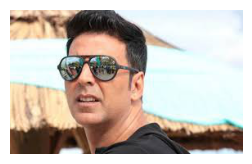

In [73]:
showimg('train/BollywoodActorImages/akshay_kumar/36f3127fbe.jpg',from_array=False)

In [88]:
from mtcnn import MTCNN

def detect_faces_mtcnn(image_path):
    detector = MTCNN()
    image = cv2.imread(image_path)
    faces = detector.detect_faces(image)
    rectangles = [face['box'] for face in faces if face['confidence']>0.70]
    images = []
    for rectangle in rectangles:
        x,y,w,h = rectangle
        images.append(image[y:y+h, x:x+w])
    return faces if images else print("No face")

# showimg(detect_faces_mtcnn('./train/BollywoodActorImages/ajay_devgn/1e8a3d874f.jpg')[0])
face = detect_faces_mtcnn('./train/BollywoodActorImages/ajay_devgn/1e8a3d874f.jpg')

1/1 [==============================] - 0s 467ms/step


In [89]:
face

[{'box': [69, 42, 88, 117],
  'confidence': 0.722470760345459,
  'keypoints': {'left_eye': (98, 88),
   'right_eye': (133, 87),
   'nose': (118, 106),
   'mouth_left': (103, 133),
   'mouth_right': (130, 133)}}]

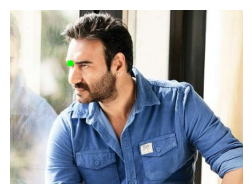

In [96]:
image = cv2.imread('./train/BollywoodActorImages/ajay_devgn/1e8a3d874f.jpg')


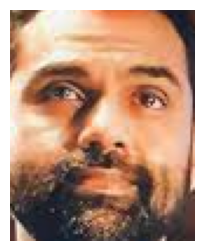

In [64]:
import os
import sys
import contextlib

from mtcnn import MTCNN

# Function to suppress stdout
@contextlib.contextmanager
def suppress_stdout():
    with open(os.devnull, 'w') as fnull:
        with contextlib.redirect_stdout(fnull):
            yield
            
            
# Function to detect faces using MTCNN and suppressing its stdout
def detect_faces_mtcnn_silent(image_path):
    with suppress_stdout():
        detector = MTCNN()  # Initialize the MTCNN detector
        image = cv2.imread(image_path)  # Read the image
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB as MTCNN expects RGB images
        faces = detector.detect_faces(image_rgb)  # Detect faces in the image
    rectangles = [face['box'] for face in faces if face['confidence'] > 0.70]  # Filter faces with confidence > 0.70
    images = []
    for rectangle in rectangles:
        x, y, w, h = rectangle
        face_img = image[y:y+h, x:x+w]  # Crop the face from the image
        images.append(face_img)
    return images


In [ ]:
def process_images(source_directory, destination_directory):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)
    
    # Loop through each subdirectory in the source directory
    for subdir in os.listdir(source_directory):
        subdir_path = os.path.join(source_directory, subdir)

        if os.path.isdir(subdir_path):
            count = 1
            # Loop through each file in the subdirectory
            for file in tqdm(os.listdir(subdir_path),desc=f"Processing {subdir}"):
                if file.endswith('.jpg') or file.endswith('.png'):
                    file_path = os.path.join(subdir_path, file)

                    # Process the image to find faces with two eyes
                    face_images = detect_faces_mtcnn_silent(file_path)
                    for face_image in face_images:
                        
                        if face_image is not None:
                            # Save the detected face region
                            destination_path = os.path.join(destination_directory, f"{subdir}_{count}.jpg")
                            cv2.imwrite(destination_path, face_image)
    #                         print(f"Saved face with two eyes to {destination_path}")
                            count += 1

    print("Processing and saving faces completed.")

# Example usage:
source_directory = "./train/BollywoodActorImages/"
destination_directory = "./TrainData/FaceImages"
process_images(source_directory, destination_directory)

In [ ]:
source = './TrainData/FaceImages'
resized_dest = 'TrainData/ResizedFaces'

if not os.path.exists(resized_dest):
    os.makedirs(resized_dest)
    
target_size = (64,64)   

for filename in tqdm(os.listdir(source), desc=f"Resizing. to {target_size}"):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the image
        img = cv2.imread(os.path.join(source, filename))
        
        # Resize the image
        resized_img = cv2.resize(img, target_size)
        
        # Save the resized image to the output directory
        cv2.imwrite(os.path.join(resized_dest, filename), resized_img)

print("Resizing complete.")